<h1><center>First EDA Project!</center></h1>


# Uber Data Analysis

Hello all!

I am so excited to share with you my very first python based EDA. It is very basic in comparison to what the world is currently at but I am rather proud of this simple first step. Why, you ask? Well, if one month ago someone had come to me and said I would be able to make these graphs, maps and histograms and heat maps and what not I wouldn't have believed you.

Anyway, here it is! I will keep popping up in the middle to explain whatever thought went behind doing whatever I did.

## Sections
### 1. Import Required Libraries
### 2. Load Dataset
### 3. Date and Time Parsing and adding some useful columns
### 4. Analysis using parsed Date Time
### 5. Playing around with the Latitude and Longitude Data

## Section 1: Import Required Libraries

This specific analysis requires nothing more than the pandas for dataframe creation and analysis and seaborn for plotting various graphs that are used. 

The magic function, %pylab inline will ensure that all the plots are displayed on the notebook itself and not bring up a pop up with the desired plot.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Section 2: Load Dataset

This section is pretty much self explanatory, for perfomring any analysis we will require the data. Since I will be making this notebook available on my github profile, I think it is best if I fetch the data from a place where anyone can download the data from. Hence I have used URL for fetching the data.

In [2]:
URL = "https://raw.githubusercontent.com/TheDataMarshal/Uber-Data-Analysis/master/uber-raw-data-apr14.csv"
data = pd.read_csv(URL, sep=',')

In [3]:
# I know many have a habit of using the df.head() function for getting a glimpse of the dataframe. I just like to use df.tail()
data.tail() 

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


## Section 3. Date and Time Parsing and adding some useful columns

We can see above that the data is a very simple collection of Date/Time, Latitude, Longitude and Base information. What is particularly irritating, atleast for me, is that the Date/Time a string. So performing any analysis on the basis Date/Time will be very difficult. Let me show you how difficult it can get.

What I have done in next few cells is try and extract the Date information from one of the values from Date/Time Column.

In [5]:
dt = '4/30/2014 23:31:00' #Just a variable with one of the values copied from Date/Time Column.

In [6]:
d, t = dt.split(' ') #I have used the split function to seperate Date and Time.
print(d)
print(t)

4/30/2014
23:31:00


In [7]:
m,d,y =d.split('/') # Again, spliting the data by '/' for getting every detail seperately.

In [8]:
print("Date: " + d)
print("Month: " + m)
print("Year: " +y)

Date: 30
Month: 4
Year: 2014


I hope you noticed how long it was to get DD, MM, YY details using spliting for just one value. Now imagine doing this for 
each and every entry. What? we can use a for loop for getting this done? Well yes we can. But, let me show you something really
amazing that I came across. 

In [9]:
dt = pd.to_datetime(dt) #This is a pandas function that can be used for parsing the Date/Time from string to the DateTime format

In [10]:
dt.day_name(locale = 'English') #Printing the weekday name is as simple as that!!

'Wednesday'

In [11]:
dt.week #Which week of the year it is?

18

### If you are anything like me, I am sure you are already getting excited by the kind of analysis that can be done using that amount of freedom with the Date Time information of the Data. Weekly Analysis, Weekday Analysis, Date of the Month Analysis and what not! 

### I have tried to do some of that below, I am sure there can be many many more stuff that can be done. I'd like to take it slow and steady though. 

In [12]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)
#It is supposed to take that long. Patience is key here.

.map() as clear as the name is, it maps whatever function that is passed to the element that it is attached to. To explain it better, what the above cell does is that it maps each and every value in the Date/Time column with the mapped function to_datetime to give an output of the Date/Time values in Date Time format.

In [13]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [14]:
data['Date/Time']

0        2014-04-01 00:11:00
1        2014-04-01 00:17:00
2        2014-04-01 00:21:00
3        2014-04-01 00:28:00
4        2014-04-01 00:33:00
                 ...        
564511   2014-04-30 23:22:00
564512   2014-04-30 23:26:00
564513   2014-04-30 23:31:00
564514   2014-04-30 23:32:00
564515   2014-04-30 23:48:00
Name: Date/Time, Length: 564516, dtype: datetime64[ns]

In [15]:
dt = data['Date/Time']

In [16]:
def get_dom(dt): #The Function defined here, returns the Date of the Month value.
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom) #This will help us analyse the data from monthly data perspective.

In [17]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [18]:
def get_weekday(dt): #The Function defined here, returns the Day of the Week value.
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday) #This will help us analyse the day from weekly data perspective.

def get_hour(dt): #The Function defined here, returns the Hour of the Day value.
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour) #This will help us analyse the data from hourly data perspective.

In [19]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Section 4. Analysis using parsed Date Time

Now is when the real fun starts! I have tried below, making some plots that will be helpful for us to understand what kind of data we are dealing with. Also, I have made some really weird and outright useless plots. (You will see.) 

Text(0.5, 1.0, 'Frequency of DoM - Uber - April 2014')

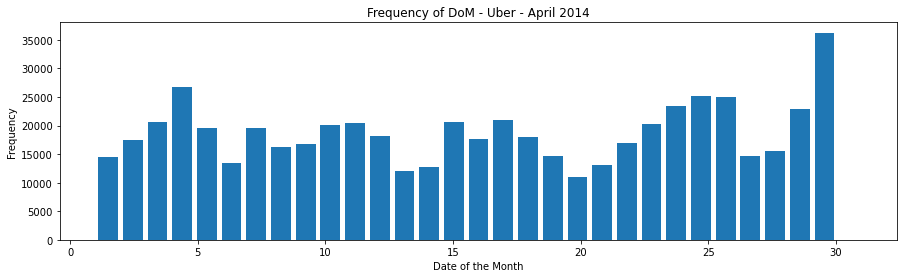

In [20]:
figure(figsize = (15,4))
hist(data.dom, bins = 31,rwidth = 0.8, range = (1 , 31))
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency of DoM - Uber - April 2014')

We can notice the wavey pattern of the data showing that weekly there are more rides than on the weekends.

In [21]:
#An histogram is not the only way to show the spread of the data. We can also do it with the Bar Graph.

def count_rows(rows): 
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

#For doing that, we will require bins, or in other words, grouping of the count of rows which have the same same Date of Month.

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

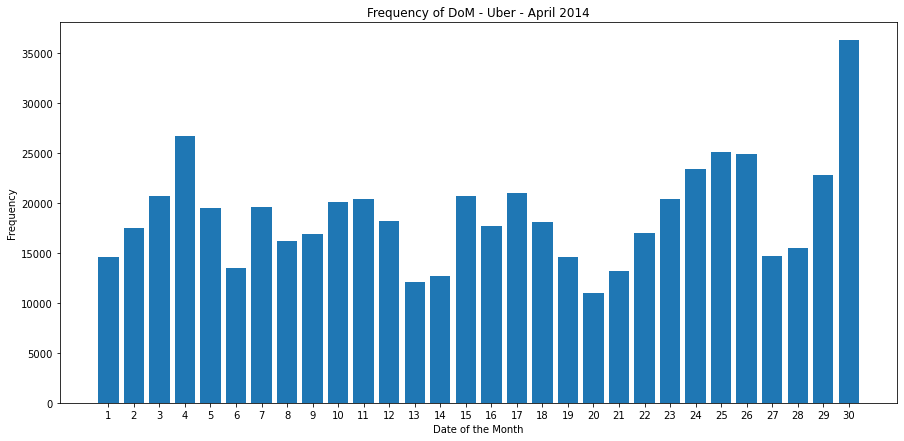

In [22]:
figure(figsize = (15,7))
bar(range(1, 31),by_date) # And here we plot the Bar graph
xticks(range(1,31),by_date.index)
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency of DoM - Uber - April 2014');

In [23]:
by_date_sorted = by_date.sort_values()
by_date_sorted

#Let's sort the values in the ascending order to see the slope of the data clearly.

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

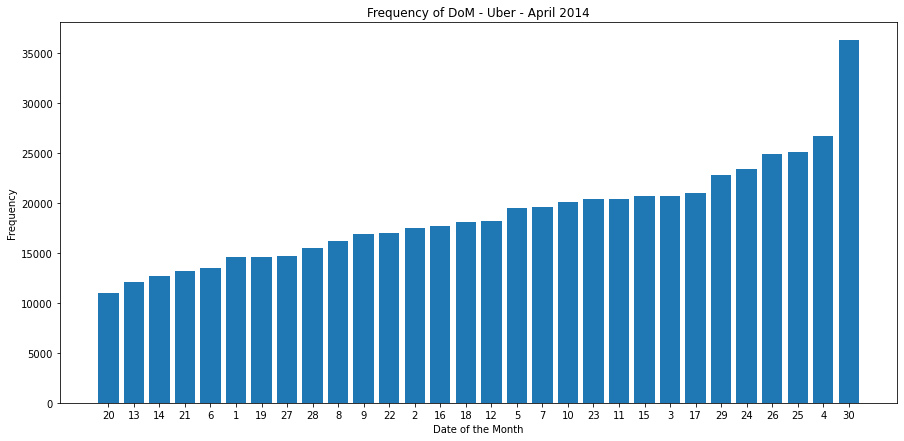

In [24]:
figure(figsize = (15,7))
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency of DoM - Uber - April 2014');

### Analysis done for specific to Hours of the Day

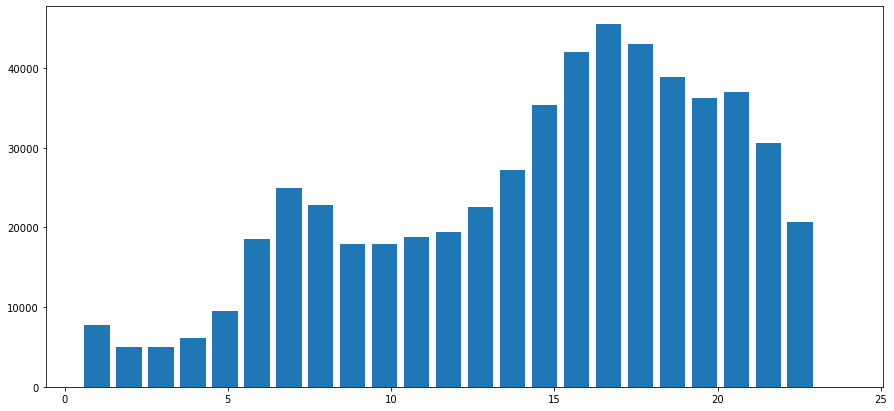

In [25]:
figure(figsize = (15,7))
hist(data.hour,bins = 24, rwidth = 0.8, range = (0.5,24));

### Analysis done of rides spread across weekdays.

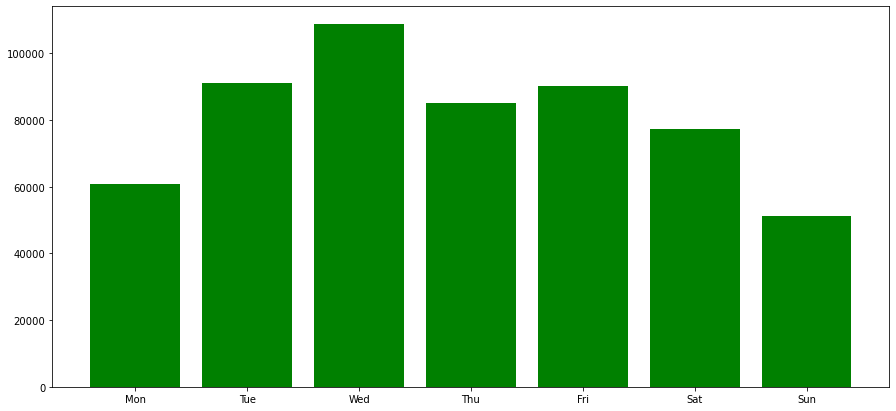

In [26]:
figure(figsize = (15,7))
hist(data.weekday, bins = 7 , range = (-0.5,6.5), rwidth = 0.8, color = 'green')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

### Let's make a heatmap!

In [27]:
count_rows(data)

564516

In [28]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

### One of the most informative plots I have found is the Heatmap. It displays 3 degree of information in a simple to understand view. The X-Axis, Y-Axis and the intensity of the color adds another degree of information.

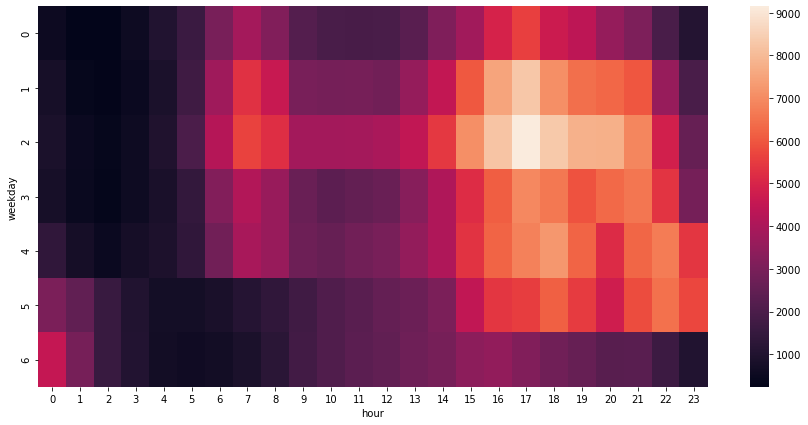

In [29]:
figure(figsize = (15,7))
sns.heatmap(by_cross)

## Section 5. Playing around with the Latitude and Longitude Data

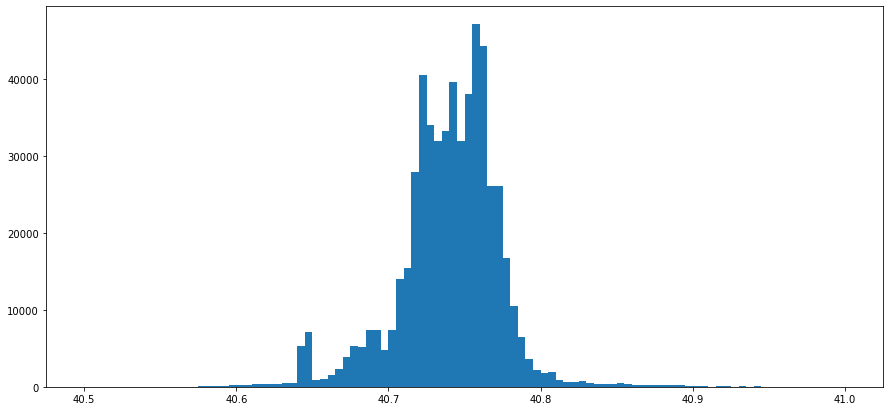

In [30]:
figure(figsize = (15,7))
hist(data['Lat'], bins = 100, range = (40.5,41)); #Let's see how the Latitude Data is spread.

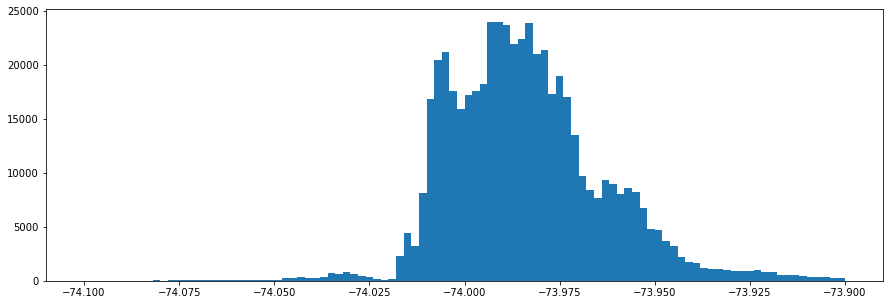

In [31]:
figure(figsize = (15,5))
hist(data['Lon'], bins = 100, range = (-74.1,-73.9));#Let's see how the Longitude Data is spread.

### Now, I can see the confused look on your face. Why am I being such a weirdo plotting histograms for Longitude and Latitude data? Well, Simple answer is to get the range of the data. I will show you in just a few mins why that is important step.

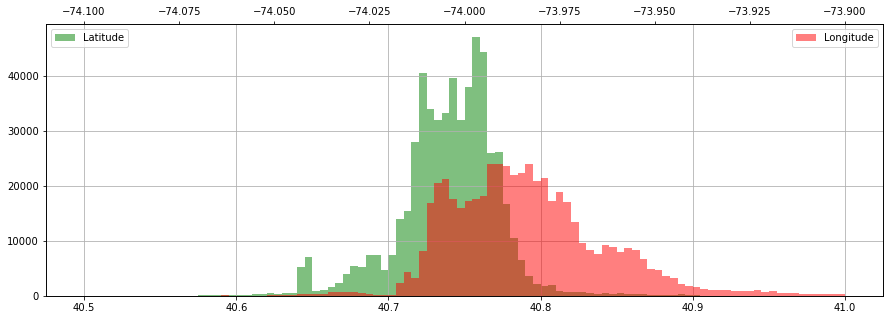

In [32]:
figure(figsize = (15,5))
hist(data['Lat'], bins = 100, range = (40.5,41), color = 'g', alpha = 0.5, label = 'Latitude')
grid()
legend(loc = 'upper left')
twiny()
hist(data['Lon'], bins = 100,color = 'r', range = (-74.1,-73.9), alpha = 0.5, label = 'Longitude')
legend(loc = 'best');

#Now, we have started to plot the histograms, why not go one step further and plot both the values together.
#This was just for fun and to see if I can plot 2 different histograms together with different colors and legends. Viola!

## Now this is the grand finale! I am specifically very excited to show the next plot because honestly, I was not expecting it to be so beautiful.

(40.7, 41.0)

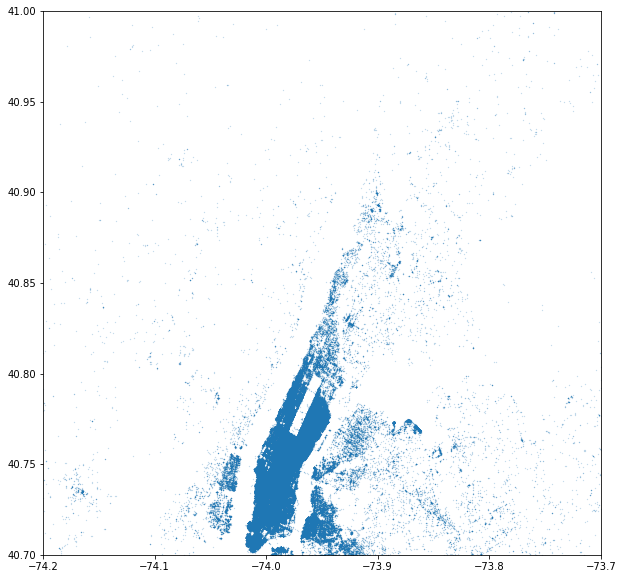

In [33]:
figure(figsize = (10,10))
plot(data['Lon'],data['Lat'],'.',ms = 0.4, alpha = 0.5)
xlim(-74.2,-73.7)
ylim(40.7,41)

# Final notes:

This dataset was rather easy to work with because it was clean. It had no null values or outliers to deal with. Hence I believe it was a perfect first project. 

I am certain that future projects will involve more coding, more analysis and more insightful plots to gather as much value from the data as it can possibly be extracted. 